In [1]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
from tensorflow import keras

### Hyperparameter

In [2]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training Parameters
learning_rate = 0.001
training_steps = 1000
batch_size = 32
display_step = 100  # display every 100 traning

# Network Parameters
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_input = 28 # number of sequences.
timesteps = 28 # time series
num_units = 32 # number of neurons for the LSTM layer

### Load and process data

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, 28, 28]), x_test.reshape([-1, 28,28])

# Normalize images value from [0, 255] to [0, 1]
x_train, x_test = x_train / 255., x_test / 255.  # normalization
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define LSTM model

In [4]:
# Create LSTM Model.
class LSTM(Model):
    # Set layers.
    def __init__(self):
        super(LSTM, self).__init__()
        # RNN (LSTM) hidden layer.
        self.lstm_layer = layers.LSTM(units=num_units)  # 32 neurons
        self.out = layers.Dense(num_classes)  # output layer, num_classes = 10

    # Set forward pass
    def call(self, x, is_training=False): # pass data x: hand_written digits (-1,28,28)
        x = self.lstm_layer(x)  # execute LSTM
        x = self.out(x)  # output layer
        if not is_training:  # in the test period
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)  # which digit
        return x

# Build LSTM model.
lstm_net = LSTM()

### Compile

In [5]:
# loss: crossentropy
# optimizer: Adam
# evaluation: accuracy
lstm_net.compile(loss = 'categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

### Training

In [6]:
lstm_net.fit(x_train,y_train, # 60000 data
             batch_size = 128,
             epochs=5,
             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.9122 - accuracy: 0.7049 - val_loss: 0.3731 - val_accuracy: 0.8894
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2959 - accuracy: 0.9135 - val_loss: 0.2117 - val_accuracy: 0.9394
Epoch 3/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2044 - accuracy: 0.9413 - val_loss: 0.1749 - val_accuracy: 0.9506
Epoch 4/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1643 - accuracy: 0.9524 - val_loss: 0.1489 - val_accuracy: 0.9564
Epoch 5/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1407 - accuracy: 0.9587 - val_loss: 0.1292 - val_accuracy: 0.9637


In [7]:
lstm_net.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 93us/sample - loss: 0.1292 - accuracy: 0.9637


[0.12923050963431595, 0.9637]

In [8]:
lstm_net.predict(x_test).argmax(axis = 1)
# argmax: turn probability into kind
# sotfmax: turn kind into probability

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [9]:
import matplotlib.pyplot as plt

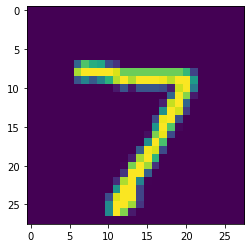

In [10]:
plt.imshow(x_test[0])